# load counts and transcripts per million from GEO

viewing https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE115978

In [21]:
import os

import numpy as np

import GEOparse

In [13]:
target_dir = "./data/geoparse"
os.makedirs(target_dir, exist_ok=True)

In [ ]:
%%capture

gse_115978 = GEOparse.get_GEO(geo="GSE115978", destdir=target_dir)

In [5]:
gse_115978.metadata["supplementary_file"]

['ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115978/suppl/GSE115978_cell.annotations.csv.gz',
 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115978/suppl/GSE115978_counts.csv.gz',
 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115978/suppl/GSE115978_tpm.csv.gz']

In [8]:
target_dir = "./data/ftp/GSE115978"
os.makedirs(target_dir, exist_ok=True)

In [9]:
import helpers

In [10]:
for ftp_url in gse_115978.metadata["supplementary_file"]:
    helpers.download_gz_from_ftp(ftp_url, target_dir)

In [12]:
!tree -h data/ftp

data/ftp
└── [4.0K]  GSE115978
    ├── [589K]  GSE115978_cell.annotations.csv
    ├── [ 99K]  GSE115978_cell.annotations.csv.gz
    ├── [346M]  GSE115978_counts.csv
    ├── [ 49M]  GSE115978_counts.csv.gz
    ├── [805M]  GSE115978_tpm.csv
    └── [227M]  GSE115978_tpm.csv.gz

1 directory, 6 files


In [ ]:
!head -2 data/ftp/GSE115978/GSE115978_tpm.csv

In [14]:
import pandas as pd

In [31]:
columns = pd.read_csv(
    filepath_or_buffer='./data/ftp/GSE115978/GSE115978_tpm.csv',
    nrows=1,
    index_col=0
).columns

dtypes = {col: np.float16 for col in columns}
dtypes['GENE'] = str

In [43]:
df_tpm = pd.read_csv(
    filepath_or_buffer='./data/ftp/GSE115978/GSE115978_tpm.csv',
#     nrows=10000,
    dtype=dtypes,
    index_col=0
)

In [44]:
df_tpm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23686 entries, C9orf152 to AQP7
Columns: 7186 entries, cy78_CD45_neg_1_B04_S496_comb to CY75_1_CD45_CD8_8__S351_comb_BCD8
dtypes: float16(7186)
memory usage: 324.8+ MB


In [45]:
import plotly.express as px

In [47]:
cells_percent_nonzero = df_tpm.astype(bool).mean(axis=0)
cells_percent_nonzero

cy78_CD45_neg_1_B04_S496_comb                      0.348645
cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb           0.086422
CY88_5_B10_S694_comb                               0.226927
cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb    0.238453
cy78_CD45_neg_3_H06_S762_comb                      0.312801
                                                     ...   
CY75_1_CD45_CD8_3__S168_comb_BCD8                  0.149033
CY75_1_CD45_CD8_8__S338_comb_BCD8                  0.163472
monika_D7_S132_comb_BCD8_3                         0.193743
CY75_1_CD45_CD8_8__S289_comb_BCD8                  0.194799
CY75_1_CD45_CD8_8__S351_comb_BCD8                  0.162923
Length: 7186, dtype: float64

In [48]:
genes_percent_nonzero = df_tpm.astype(bool).mean(axis=0)
genes_percent_nonzero

cy78_CD45_neg_1_B04_S496_comb                      0.348645
cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb           0.086422
CY88_5_B10_S694_comb                               0.226927
cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb    0.238453
cy78_CD45_neg_3_H06_S762_comb                      0.312801
                                                     ...   
CY75_1_CD45_CD8_3__S168_comb_BCD8                  0.149033
CY75_1_CD45_CD8_8__S338_comb_BCD8                  0.163472
monika_D7_S132_comb_BCD8_3                         0.193743
CY75_1_CD45_CD8_8__S289_comb_BCD8                  0.194799
CY75_1_CD45_CD8_8__S351_comb_BCD8                  0.162923
Length: 7186, dtype: float64

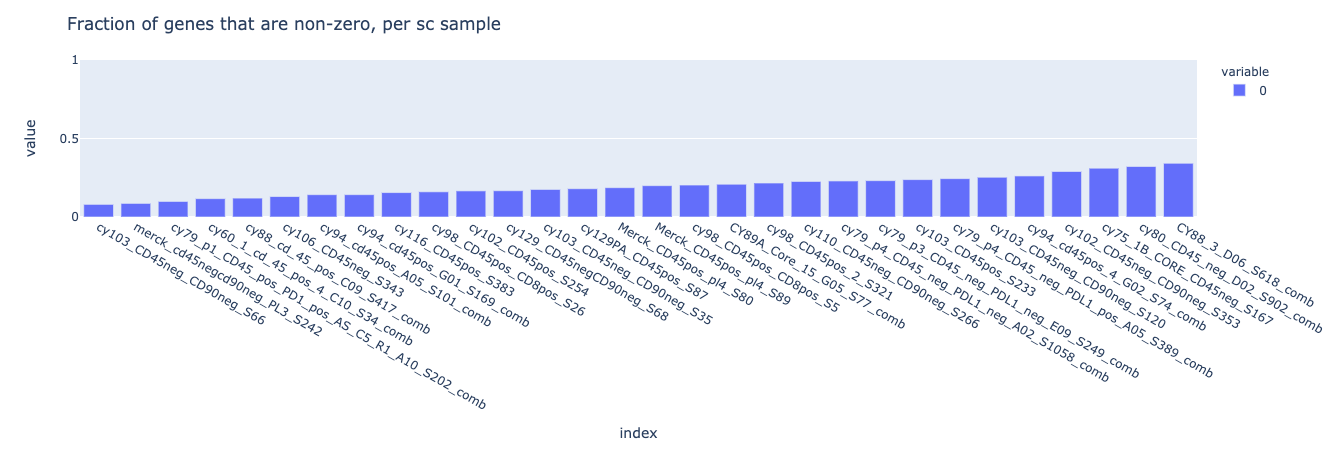

In [50]:
fig = px.bar(cells_percent_nonzero.sample(n=30).sort_values())

fig.update_layout(
    title='Fraction of genes that are non-zero, per sc sample',
)

fig.update_yaxes(range=[0, 1])

fig.show(renderer='jupyterlab+png')

In [51]:
df_cell_annotations = pd.read_csv("./data/ftp/GSE115978/GSE115978_cell.annotations.csv")

In [52]:
df_cell_annotations

,cells,samples,cell.types,treatment.group,Cohort,no.of.genes,no.of.reads
0,cy78_CD45_neg_1_B04_S496_comb,Mel78,Mal,post.treatment,Tirosh,8258,357919
1,cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,Mel79,Mal,treatment.naive,Tirosh,2047,5727
2,CY88_5_B10_S694_comb,Mel88,Mal,post.treatment,Tirosh,5375,139218
3,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,Mel79,Mal,treatment.naive,Tirosh,5648,73996
4,cy78_CD45_neg_3_H06_S762_comb,Mel78,Mal,post.treatment,Tirosh,7409,380341
...,...,...,...,...,...,...,...
7181,CY75_1_CD45_CD8_3__S168_comb_BCD8,Mel75,T.CD8,post.treatment,Tirosh,3530,137245
7182,CY75_1_CD45_CD8_8__S338_comb_BCD8,Mel75,T.CD8,post.treatment,Tirosh,3872,106432
7183,monika_D7_S132_comb_BCD8_3,Mel75,T.CD8,post.treatment,Tirosh,4589,908173
7184,CY75_1_CD45_CD8_8__S289_comb_BCD8,Mel75,T.CD8,post.treatment,Tirosh,4614,140903


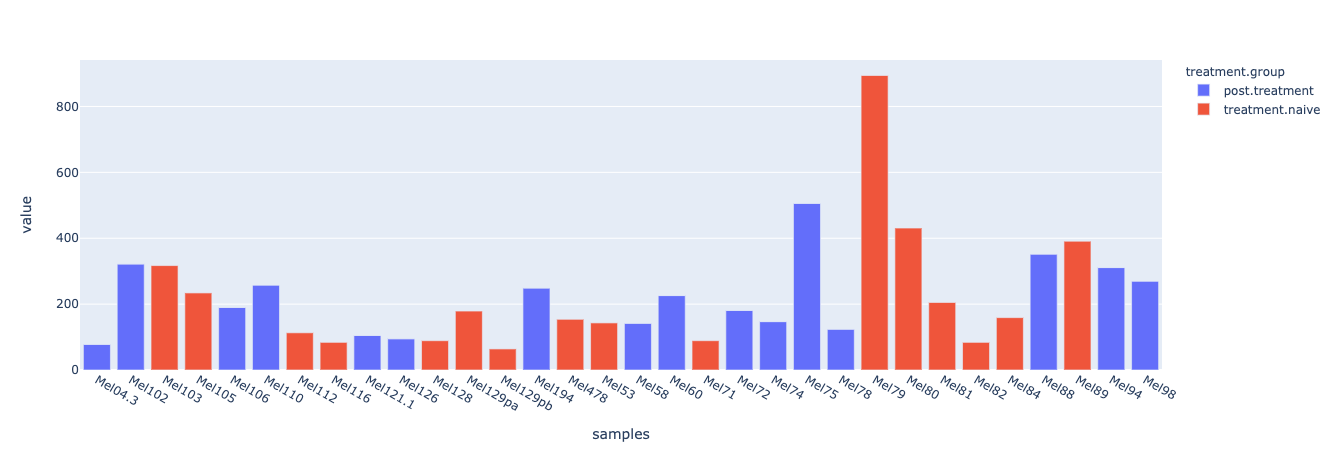

In [73]:
fig = px.bar(
    df_cell_annotations.pivot_table(index="samples", columns="treatment.group", aggfunc='size', fill_value=0)
)

fig.show(renderer='jupyterlab+png')

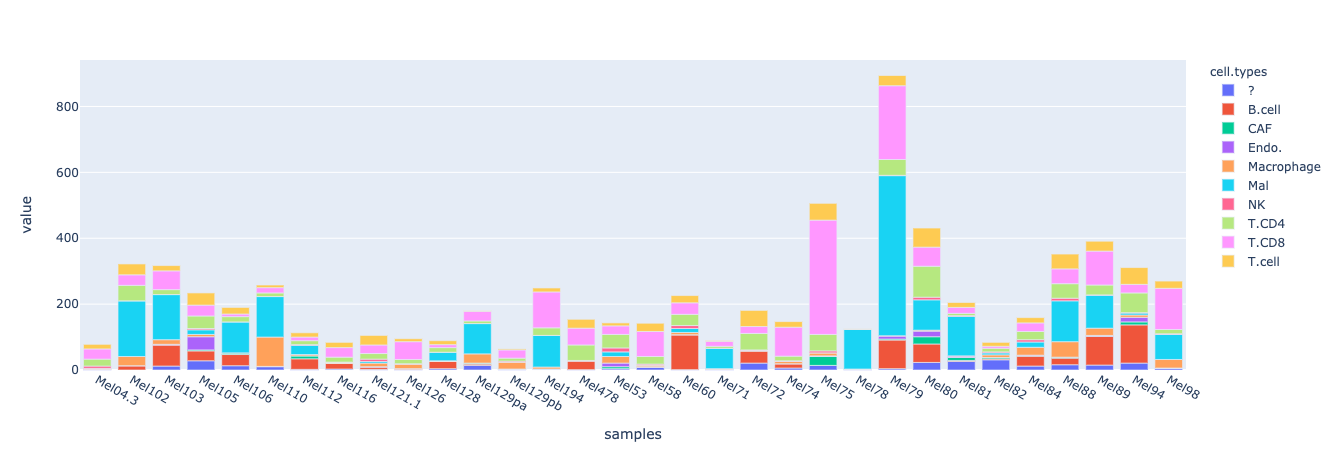

In [74]:
fig = px.bar(
    df_cell_annotations.pivot_table(index="samples", columns="cell.types", aggfunc='size', fill_value=0)
)

fig.show(renderer='jupyterlab+png')

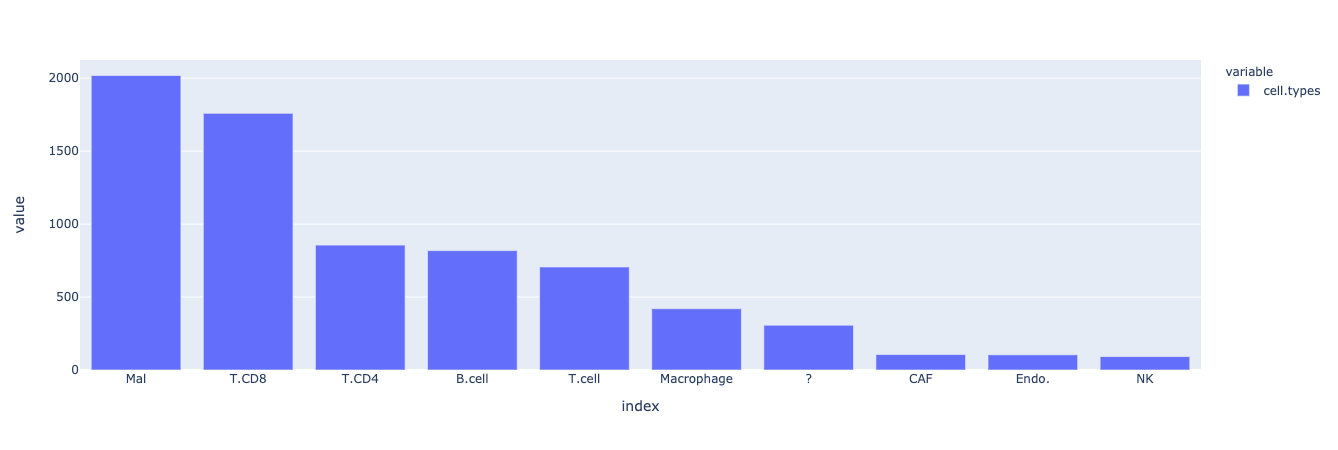

In [76]:
fig = px.bar(
    df_cell_annotations["cell.types"].value_counts()
)

fig.show(renderer='jupyterlab+png')

In [72]:
# average nonzero rate

df_tpm.astype(bool).values.mean()

0.19325059382191145